In [29]:
import pandas as pd
import numpy as np

from dataProcessing import processing
path = f'../Data'
dfs = processing(path)

In [30]:
from xgboost import XGBRegressor    
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

In [31]:
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()

In [32]:
scaler = StandardScaler()

for year in range(2020, 2024):

    # Shifting by 1, as we are using the data of the previous game to predict the 'PTS' of the next.
    dfs[f'Data\\{year}']['PtsNextGame'] = (dfs[f'Data\\{year}'])['PTS'].shift(-1) 

    X = dfs[f'Data\\{year}'].drop('PtsNextGame', axis = 1)
    y = dfs[f'Data\\{year}']['PtsNextGame']

    # Removing the NaN values formed at the last due to the shift

    X = X.iloc[:-1]
    y = y.iloc[:-1]

    X = X.to_numpy()
    y = y.to_numpy()

    X = X.reshape((X.shape[0], X.shape[1]))
    y = y.reshape(y.shape[0],1)

    X = scaler.fit_transform(X)

    model.fit(X,y)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

dfs[f'Data\\2024']['PtsNextGame'] = (dfs[f'Data\\2024'])['PTS'].shift(-1) # Shifting by 1.

X_test = dfs['Data\\2024'].drop('PtsNextGame', axis = 1)
X_test = X_test.iloc[:-1] # Removing NaN value formed by shift.
X_test = scaler.fit_transform(X_test)

y_test = dfs['Data\\2024']['PtsNextGame']
y_test = y_test.iloc[:-1] # Removing NaN value formed by shift.

predictions = model.predict(X_test)

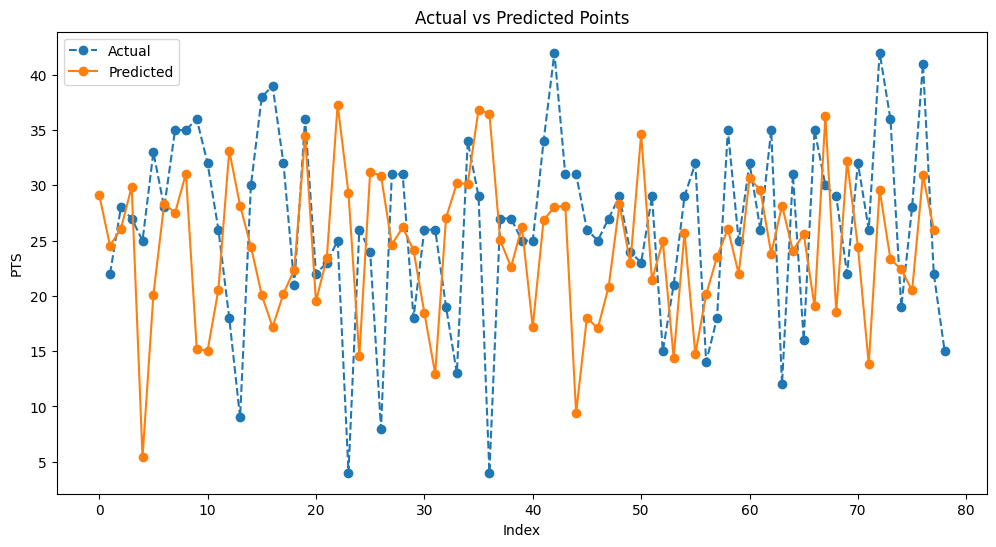

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='--', marker='o')
plt.plot(predictions, label='Predicted', linestyle='-', marker='o')
plt.xlabel('Index')
plt.ylabel('PTS')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()

<Axes: >

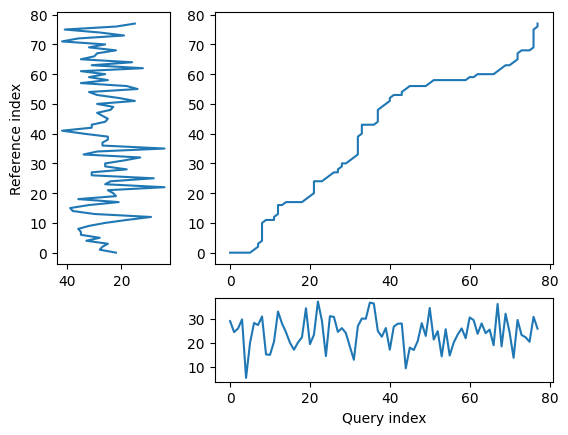

In [35]:
# Dynamic Time Warping algorithm similarity test 

from dtw import *

query = predictions
template = y_test.to_numpy()

alignment = dtw(query, template, keep_internals=True)
alignment.plot(type="threeway")